## Preprocessing

In [12]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [14]:
df = pd.read_csv('./data/final/01_phylum_dedornot_ra.csv')

In [15]:
df.head()

,Index,Patient=1,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,...,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,0.076111,0.0,0.059049,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,0.633781,0.0,0.008703,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,67,0,0,31.25,17.0
2,P3,1,0.000233,0.007146,0.0,0.083282,0.0,0.065788,0.0,0.0,...,0.0,0.0,0.0,0.01888,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,0.163522,0.0,0.013764,0.0,0.0,...,0.0,0.0,0.0,0.00000,1,66,0,0,93.75,21.0
4,P5,1,0.000164,0.000000,0.0,0.225815,0.0,0.035394,0.0,0.0,...,0.0,0.0,0.0,0.00000,0,69,0,0,6.25,7.0


In [16]:
df.iloc[:,2:]

,None;Other,Archaea;Euryarchaeota,Bacteria;Acidobacteria,Bacteria;Actinobacteria,Bacteria;Armatimonadetes,Bacteria;Bacteroidetes,Bacteria;Chlamydiae,Bacteria;Chloro1lexi,Bacteria;Cyanobacteria,Bacteria;Deinococcus-Thermus,...,Bacteria;Synergistetes,Bacteria;Tenericutes,Bacteria;Thermotogae,Bacteria;Verrucomicrobia,Gender 1=F,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,0.000000,0.000000,0.0,0.076111,0.0,0.059049,0.0,0.0,0.010153,0.015403,...,0.0,0.0,0.0,0.00000,1,65,0,0,NaN,NaN
1,0.000000,0.000000,0.0,0.633781,0.0,0.008703,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,1,67,0,0,31.25,17.0
2,0.000233,0.007146,0.0,0.083282,0.0,0.065788,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.01888,1,33,0,0,33.30,16.0
3,0.000000,0.000000,0.0,0.163522,0.0,0.013764,0.0,0.0,0.000000,0.005638,...,0.0,0.0,0.0,0.00000,1,66,0,0,93.75,21.0
4,0.000164,0.000000,0.0,0.225815,0.0,0.035394,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,0,69,0,0,6.25,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000128,0.000000,0.0,0.557789,0.0,0.018314,0.0,0.0,0.007885,0.002309,...,0.0,0.0,0.0,0.00000,1,50,1,0,14.50,9.0
87,0.000153,0.000000,0.0,0.455137,0.0,0.000529,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.00000,1,60,0,0,0.00,2.0
88,0.000395,0.000000,0.0,0.284385,0.0,0.006841,0.0,0.0,0.000760,0.000000,...,0.0,0.0,0.0,0.00000,1,51,1,1,14.50,3.0
89,0.000000,0.000000,0.0,0.595302,0.0,0.004668,0.0,0.0,0.000146,0.000000,...,0.0,0.0,0.0,0.00000,1,48,0,0,0.00,0.0


In [17]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [18]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(72, 31)
(19, 31)
(72,)
(19,)


## Train, predict and explain

### XGBoost

In [21]:
clfxgb = XGBClassifier(random_state=42)
clfxgb.fit(X, y)
y_predxgb = clfxgb.predict(X)

In [22]:
print('Accuracy:',accuracy_score(y, y_predxgb))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predxgb))
print('F1 score:',f1_score(y, y_predxgb,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predxgb))
print(confusion_matrix(y, y_predxgb))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


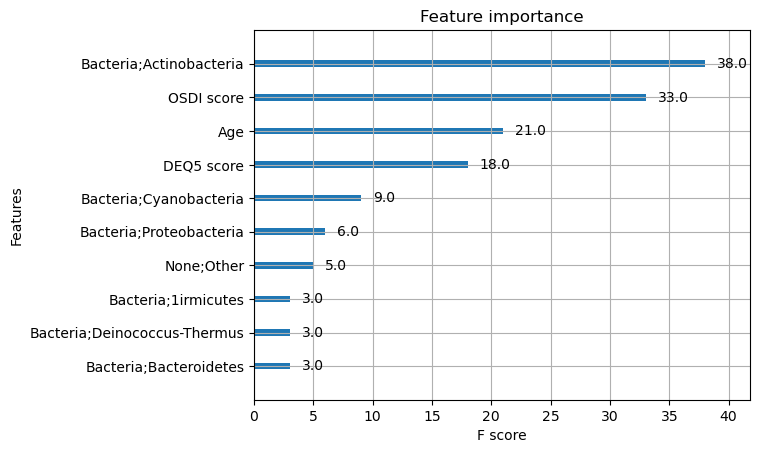

In [23]:
fig, ax = plt.subplots()
plot_importance(clfxgb, max_num_features = 20, ax=ax)
plt.title('Feature importance')

plt.show()

In [24]:
# Create a SHAP explainer for the XGBoost model
explainerxgb = shap.Explainer(clfxgb, X_test)

# Compute SHAP values for the dataset
shap_valuesxgb = explainerxgb(X_test)

[13:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


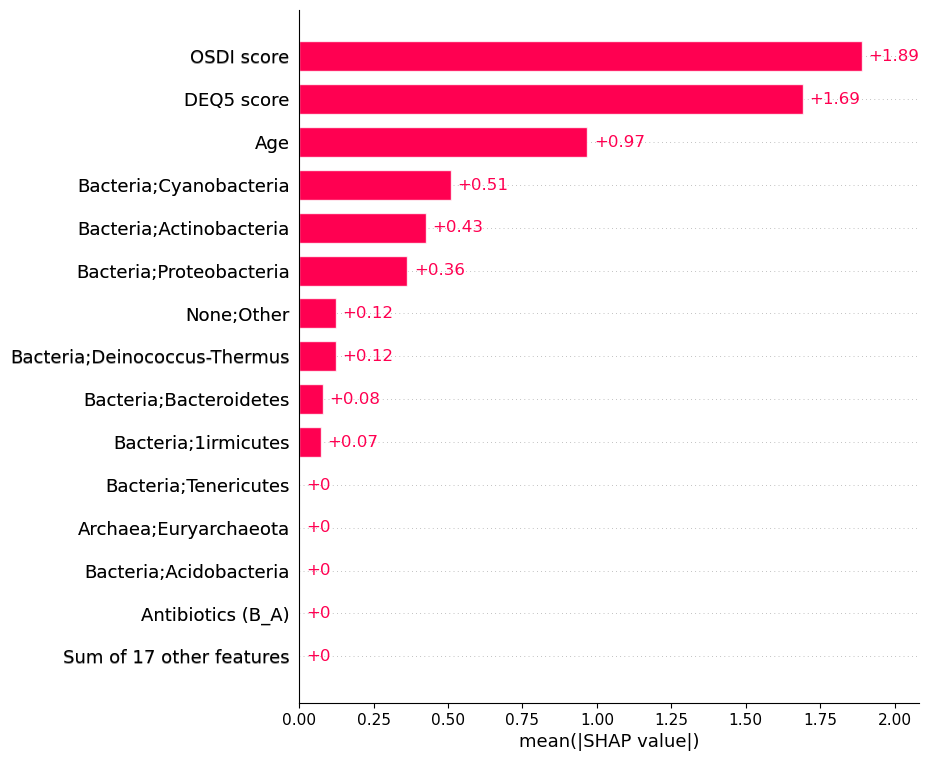

In [25]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valuesxgb, max_display=15)

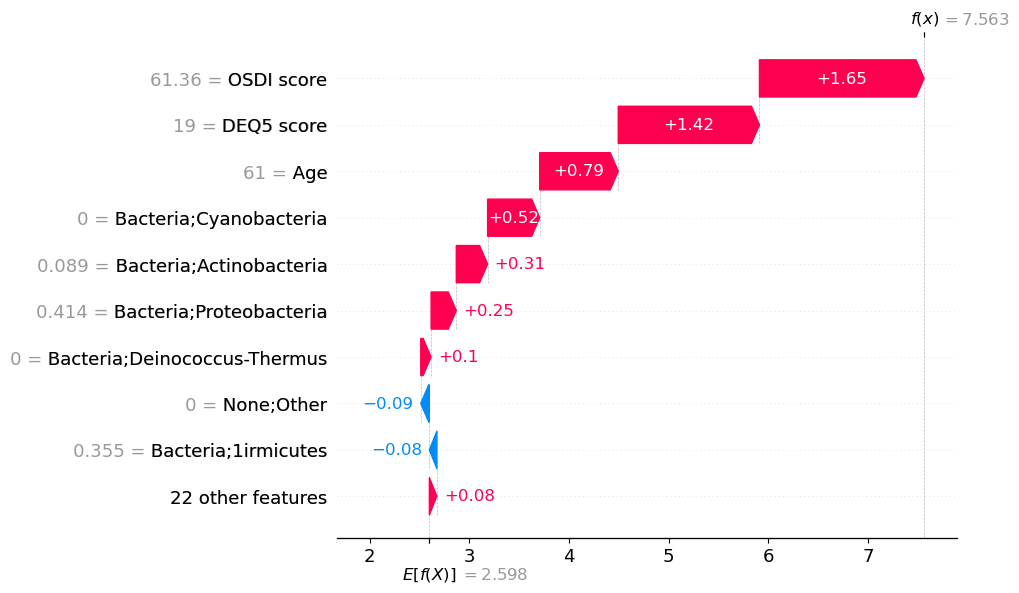

In [26]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valuesxgb[instance_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


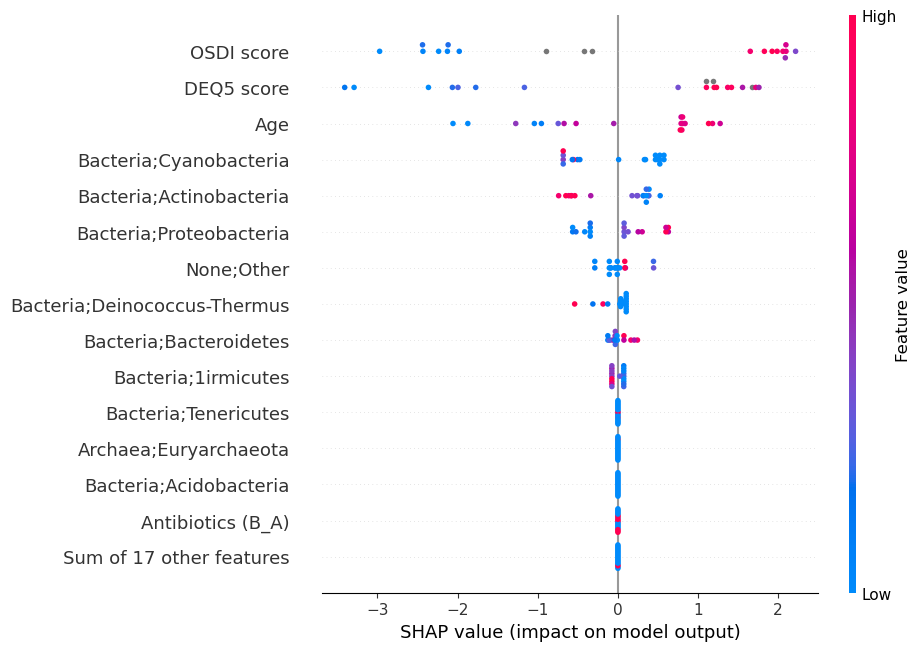

In [37]:
shap.plots.beeswarm(shap_valuesxgb, max_display=15)

### LightGBM

In [ ]:
clflgbm = LGBMClassifier(random_state=42)
clflgbm.fit(X, y)
y_predlgbm = clflgbm.predict(X)

In [29]:
print('Accuracy:',accuracy_score(y, y_predlgbm))
print('Balanced accuracy: ',balanced_accuracy_score(y, y_predlgbm))
print('F1 score:',f1_score(y, y_predlgbm,average='weighted'))
print('MCC:', matthews_corrcoef(y, y_predlgbm))
print(confusion_matrix(y, y_predlgbm))

Accuracy: 1.0
Balanced accuracy:  1.0
F1 score: 1.0
MCC: 1.0
[[30  0]
 [ 0 61]]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

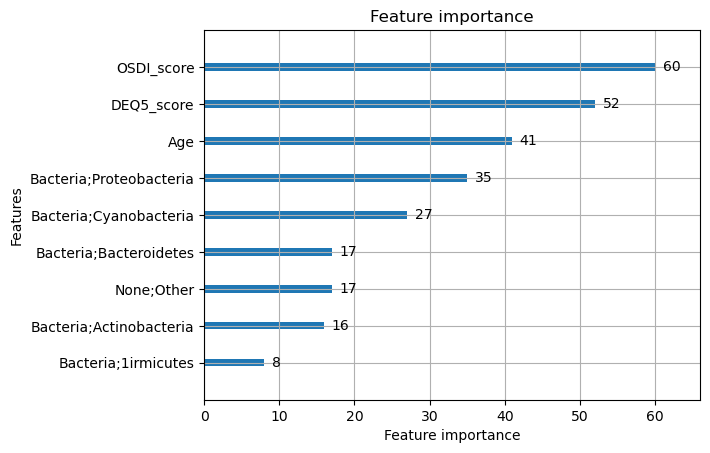

In [30]:
lgb.plot_importance(clflgbm)

In [31]:
# Create a SHAP explainer for the LightGBM model

explainerlgbm = shap.Explainer(clflgbm, X_test)

In [32]:
# Compute SHAP values for the dataset

shap_valueslgbm = explainerlgbm(X_test)

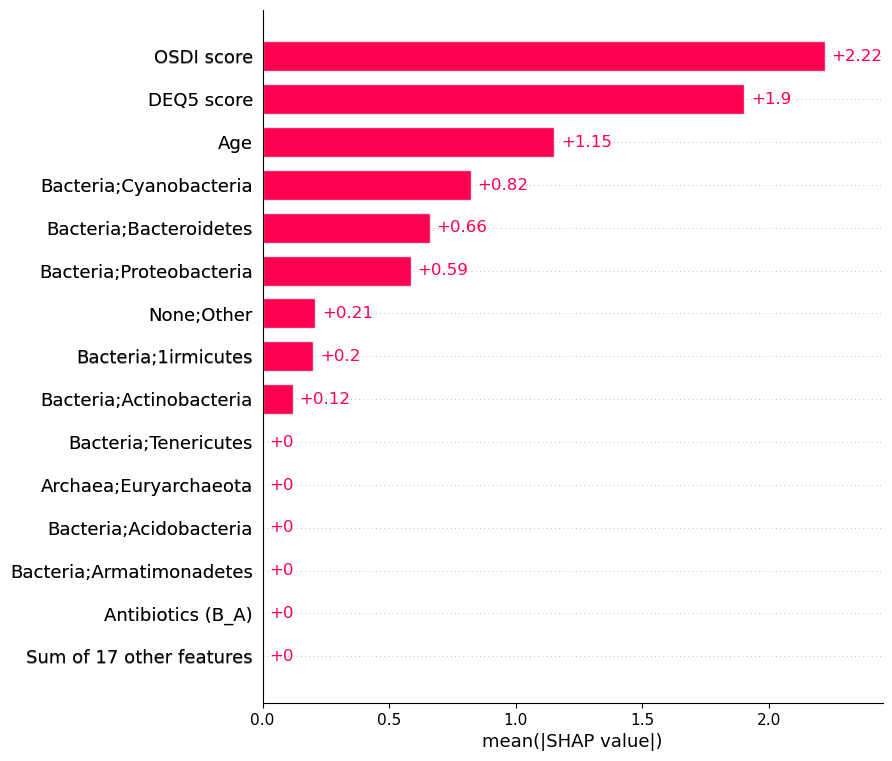

In [33]:
# Plot the SHAP summary plot

shap.plots.bar(shap_valueslgbm, max_display=15)

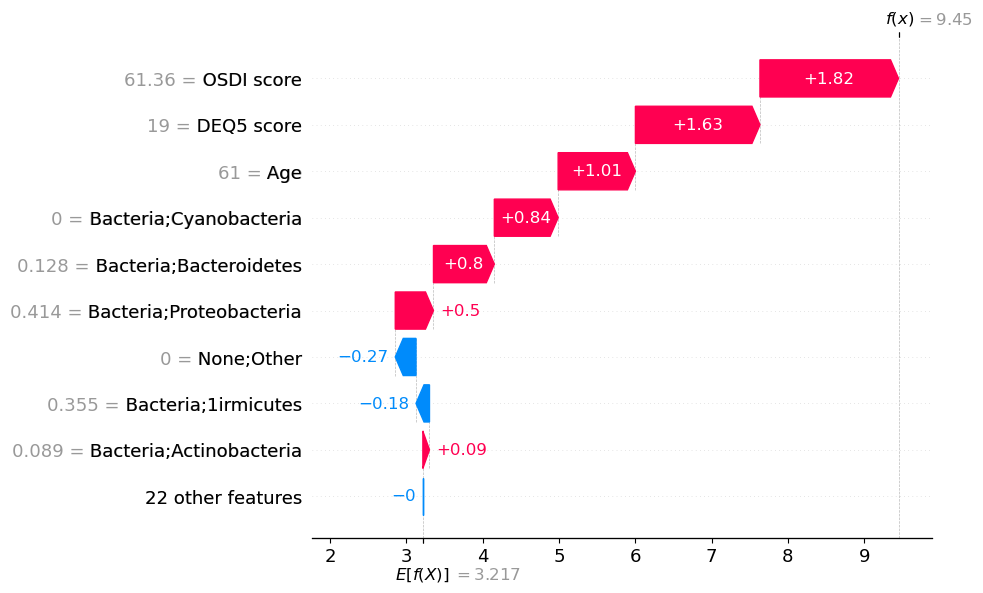

In [34]:
# Plot the SHAP decision plot for a specific instance
# Replace 'instance_index' with the index of the instance you want to visualize
instance_index = 0  # Example instance index
shap.plots.waterfall(shap_valueslgbm[instance_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


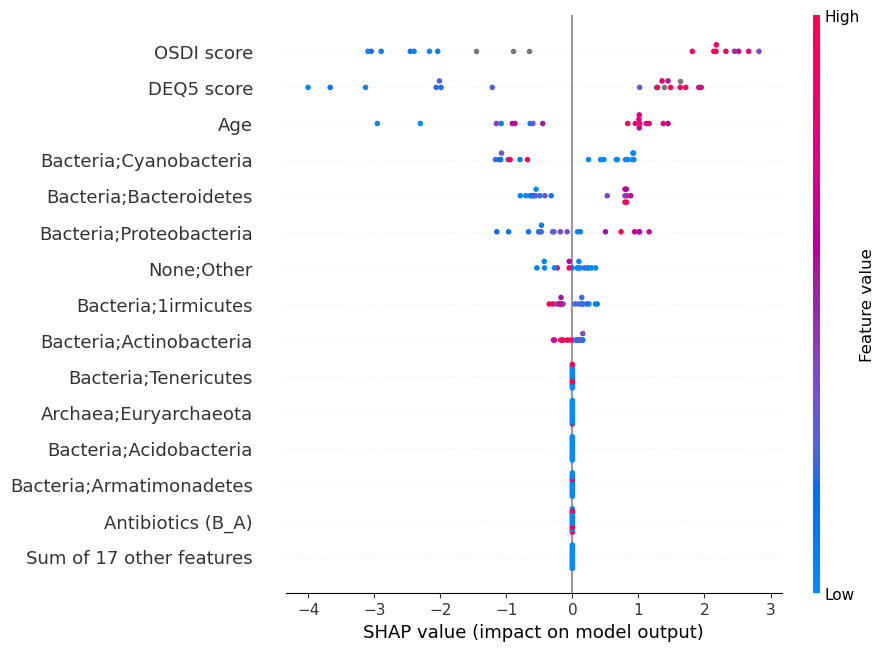

In [36]:
shap.plots.beeswarm(shap_valueslgbm, max_display=15)